In [1]:
#importando las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Cargando los datos 
data_game= pd.read_csv('games.csv')
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#renombrando columnas 
columnas=data_game.columns
columnas_minuscula=[]
for s in columnas: 
    columnas_minuscula.append(s.lower())
data_game.columns=columnas_minuscula

## Conversion del tipo de dato 

Comenzamos por la conversion del tipo de dato de algunas columnas. 
En esta primera parte evidenciaremos el porque del cambio de dato.

In [4]:
print(data_game.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [5]:
#analizando la columna 'user_score' 
print(data_game['user_score'].value_counts())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


Como sabemos 'user_score' es el puntaje que le colocan los usuarios a un determinado juego y como este es un numero de tipo flotante es recomendable cambiar el tipo de dato object a flotante. Pero antes observamos que existe una calificacion denotada como 'TBD' ('to be determined'). El cambio de dato no se pude efectuar ya que este es un string por lo que cambiaremos esta calificacion como 999. Como las calificaciones van del 1 al 10, '999' nos indica que no se ha podido determinar aún la calificación. 

In [6]:
#Cambiamos 'tbd' a 999
data_game.loc[data_game['user_score']=='tbd','user_score']=999 
#Cambio en el tipo de dato 
data_game['user_score']=data_game['user_score'].astype('float')

In [7]:
#Analizando la columna 'rating' 
print(data_game['rating'].value_counts())
print('la cantidad de valores ausentes: ',data_game['rating'].isna().sum())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64
la cantidad de valores ausentes:  6766


Completaremos estos valores ausentes como 'no rating' (No clasificado). Como ultimo paso convertiremos el tipo de dato a categorico.

In [8]:
data_game['rating'].fillna('no rating',inplace=True)
#Cambiando el tipo de dato 
data_game['rating']=data_game['rating'].astype('category')

## Tratamiento de duplicados 

In [9]:
duplicados=data_game.duplicated().sum()
print('la cantidad de filas totalmente duplicadas: ',duplicados)

la cantidad de filas totalmente duplicadas:  0


In [10]:
print(data_game['name'].duplicated().sum())

5155


In [11]:
print(data_game['name'].value_counts())

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64


In [12]:
print(data_game[data_game['name']=='Need for Speed: Most Wanted'].head(5))

                             name platform  year_of_release   genre  na_sales  \
253   Need for Speed: Most Wanted      PS2           2005.0  Racing      2.03   
523   Need for Speed: Most Wanted      PS3           2012.0  Racing      0.71   
1190  Need for Speed: Most Wanted     X360           2012.0  Racing      0.62   
1591  Need for Speed: Most Wanted     X360           2005.0  Racing      1.00   
1998  Need for Speed: Most Wanted       XB           2005.0  Racing      0.53   

      eu_sales  jp_sales  other_sales  critic_score  user_score     rating  
253       1.79      0.08         0.47          82.0         9.1          T  
523       1.46      0.06         0.58           NaN         NaN  no rating  
1190      0.78      0.01         0.15          83.0         8.5          T  
1591      0.13      0.02         0.10          83.0         8.5          T  
1998      0.46      0.00         0.05          83.0         8.8          T  


Nombres de juegos repetidos pero con cambios de plataforma, y con diferentes años de lanzamiento por lo que no hay de que preocuparse de estos duplicados. 

## Tratamiento de valores ausentes 

In [13]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  float64 
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       10014 non-null  float64 
 10  rating           16715 non-null  category
dtypes: category(1), float64(7), object(3)
memory usage: 1.3+ MB


### columna name 

In [14]:
print(data_game[data_game['name'].isna()])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score     rating  
659           0.08           NaN         NaN  no rating  
14244         0.00           NaN         NaN  no rating  


Al no tener el nombre del juego y ser dos filas que no contiene esta informacion importante, lo mas conveniente seria eliminar estas filas. 

In [15]:
# eliminacion de filas con 'name' ausente 
data_game.dropna(subset=['name'],inplace=True)

### columna year_of_release

In [16]:
print('valores ausentes en la columna "year_of_release": ',data_game['year_of_release'].isna().sum())

valores ausentes en la columna "year_of_release":  269


Ya que representa una cantidad importante de datos, vamos a dejar estos valores como 0. Veremos mas adelante si es que en realidad afectan a nuestro analisis. Cabe recalcar que podriamos tambien eliminar estos datos o rellenarlos con la media pero tomaremos en consideración esta decision para más adelante. 

In [17]:
data_game['year_of_release'] = data_game['year_of_release'].fillna(0)
#cambio en el tipo de dato
data_game['year_of_release']= data_game['year_of_release'].astype('int')

### columna genre 

In [18]:
print('la cantidad de valores ausentes: ',data_game['genre'].isna().sum())

la cantidad de valores ausentes:  0


### columna critic_score

In [19]:
print('la cantidad de valores ausentes: ',data_game['critic_score'].isna().sum())

la cantidad de valores ausentes:  8576


La cantida de valores ausentes dentro de las critica es bastante por lo que eliminar estos datos puede llevarnos a tener errores en nuestro analisis por el momento se dejaran. 

### columna user_score 

In [20]:
print('la cantidad de valores ausentes: ',data_game['user_score'].isna().sum()) 

la cantidad de valores ausentes:  6699


### columna rating 

In [21]:
print('la cantidad de valores ausentes: ',data_game['rating'].isna().sum()) 

la cantidad de valores ausentes:  0


In [22]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  object  
 2   year_of_release  16713 non-null  int64   
 3   genre            16713 non-null  object  
 4   na_sales         16713 non-null  float64 
 5   eu_sales         16713 non-null  float64 
 6   jp_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       10014 non-null  float64 
 10  rating           16713 non-null  category
dtypes: category(1), float64(6), int64(1), object(3)
memory usage: 1.4+ MB


## Enriquecimiento de datos 

En esta seccion nos enfocaremos a la creacion de nuevas columnas que nos permitiran mas adelante a tener un mejor analisis a posterior. 

In [23]:
#creacion de una columna que acumula el total de ventas 
data_game['total_sales']=data_game['na_sales']+data_game['eu_sales']+data_game['jp_sales']+data_game['other_sales']

## Analisis de datos 

In [24]:
# Cantidad de juegos lanzados cada año 
data_fitered=data_game.groupby('year_of_release').size().reset_index()
data_fitered= data_fitered.rename(columns={0:'juegos_lanzados'}).sort_values(by=['year_of_release'])

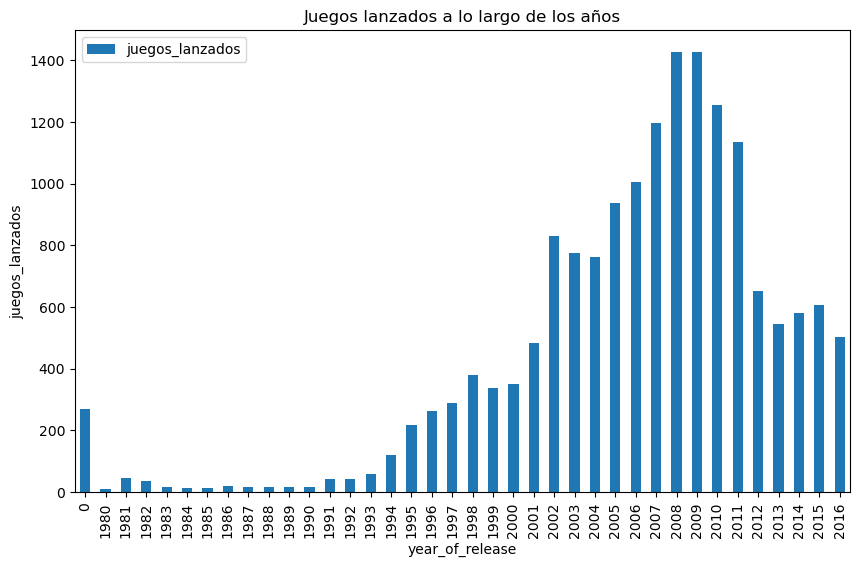

In [25]:
data_fitered.plot(kind='bar',
                  x='year_of_release',
                  y='juegos_lanzados',
                  xlabel='año_de_lanzamiento',
                  ylabel='juegos_lanzados',
                  title='Juegos lanzados a lo largo de los años',
                  figsize=(10,6),
)
plt.show()